In [64]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt 

In [65]:
def Sn(E):
# 'yadernaya tormoznaya sposobnost
# 'eV/sm

    
    M1 = 74.92
    Z1 = 33
    M2 = 72.59
    Z2 = 32
    Nat = 4.42E+22 #'chislo atomov Ge v cm^-3
    q2 = 14.4 #'eV*Ang
    
    ao = 0.528 #'Ang
    a = 0.8854 * ao / (Z1 ** (2 / 3) + Z2 ** (2 / 3)) ** (0.5) #'Ang, postoyannaya ecranirovaniya
    a1 = 1.383
    b = 0.01321
    c1 = 0.21226
    d = 0.19593
    
    eps = a * M2 * E / (q2 * Z1 * Z2 * (M1 + M2))
    
    if eps > 10:
        Sneps = mt.log(eps) / 2 / eps
    else:
        Sneps = mt.log(1 + a1 * eps) / 2 / (eps + b * eps ** c1 + d * eps ** 0.5)
        
    Sn = 8.462E-15 * Z2 * Z1 * M1 * Sneps * Nat / ((M1 + M2) * (Z2 ** (0.23) + Z1 ** (0.23))) # 'eV/sm
    
    return Sn

In [66]:
def Se(E):
# 'electronnaya tormoznaya sposobnost
# 'eV/sm
   
    M1 = 74.92
    Z1 = 33
    M2 = 72.59
    Z2 = 32
    
    q2 = 14.4 # 'eV*Ang
    Nat = 4.42E+22 # 'chislo atomov Ge v cm^-3
    
    ao = 0.528 # 'Ang
    a = 0.8854 * ao / (Z1 ** (2 / 3) + Z2 ** (2 / 3)) ** (0.5) # 'Ang, postoyannaya ecranirovaniya
    
    kk = Z1 ** (1 / 6) * 0.0793 * Z1 ** 0.5 * (M1 + M2) ** 1.5 / ((Z2 ** (2 / 3) + Z1 ** (2 / 3)) ** (3 / 4) 
                                                                  * (M1 ** 1.5 * M2 ** 0.5))
    Cr = 4 * 3.1416 * a ** 2 * M1 * M2 / (M1 + M2) ** 2  #'Ang^2
    Ce = 4 * 3.1416 * a * M2 / (Z1 * Z2 * q2 * (M1 + M2)) # '1/eV
   
    Se = kk * (Cr * 1e-16) * (E) ** 0.5 * Nat / (Ce ** 0.5) # 'eV/sm (Cr - sm^2)
    
    return Se

In [70]:
QQ = 1e15 # 'sm^-2
Em = 120000 # 'eV
M1 = 74.92
Z1 = 33
M2 = 72.59
Z2 = 32
n = Em

dE = 1

Rp = np.zeros(n + 1)
Csi = np.zeros(n + 1)
dRp1 = np.zeros(n + 1)

Rp[0] = 0
Csi[0] = 0
dRp1[0] = 0
  
for i in range(1, n):
    Rp[i] = Rp[i - 1] * (1 - M2 * Sn(i) * dE / (2 * M1 * (Se(i) + Sn(i)) * i)) + dE / (Se(i) + Sn(i))
    
    
for i in range(1, n):    
    Csi[i] = Csi[i - 1] + 2 * Rp[i] * dE / (Se(i) + Sn(i))
    
for i in range(1, n):    
    dRp1[i] = dRp1[i - 1] ** 2 + (Csi[i] - 2 * dRp1[i - 1] ** 2) * M2 * Sn(i) * dE / (M1 * (Sn(i) + Se(i)) * i)
    

dRp = ((Csi[n-1] - Rp[n-1] ** 2 - dRp1[n-1] ** 2) ** 0.5)

x = np.zeros(n+1)
C = np.zeros(n+1)                                                                                      
                                                                                      
p = 0.005
dx = p / n
x[0] = 0

for i in range(1,n):
    x[i] = x[i - 1] + dx


for i in range(1,n):   
    C[i] = (QQ / (2.5 * dRp)) * mt.exp(-(x[i] - Rp[n-1]) ** 2 / (2 * dRp ** 2))         

Rp 4.511295281076727e-06 см
dRp 3.394432569135648e-06 см


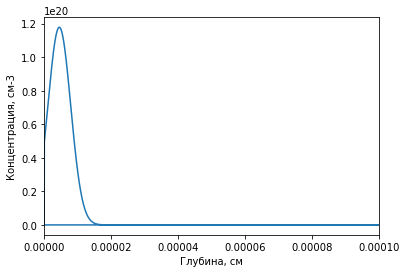

In [72]:
print(f"Rp {Rp[n-1]} см")
print(f"dRp {dRp} см")   

plt.plot(x, C)
plt.xlabel('Глубина, см')
plt.ylabel('Концентрация, см-3')
plt.xlim(0, 0.0001)
plt.show()